# Amazing RL Agent

In [3]:
import gymnasium as gym
import torch
import numpy as np
import importlib

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

In [4]:
# Test pytorch is working

x = torch.rand(size=(1000,))
x = x + 1

# If you have a nvidia gpu with torch installed correctly
# you can move the tensors to the gpu for some extra
# speed, not necessary although.
DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {DEVICE}")
# When creating a new tensor make sure you move it to a
# device using .to(DEVICE), such as:
x = x.to(DEVICE)
# The tensor in x has been moved to the device


Using cpu


In [7]:
# Import agent
import agents
import ddpg

# Reload module as jupyter notebooks wont update to any changes youve made
importlib.reload(
    agents,
)
importlib.reload(
    ddpg,
)
#agent = agents.Agent()


RENDER_AGENT = None

#agent = agents.TD3(24, 4, 1, noise=0.25, copy_step=3)
agent = ddpg.DDPG(24, 4, 1, batch_size=32)
scores = []
import matplotlib.pyplot as plt


Episode: 0, Reward: -709.3441142719391, Memory Size: 1600


/var/folders/m6/xhj9j4dn7h344m0c4whwsxd40000gn/T/ipykernel_24464/1605544981.py:47: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim((mi, ma))


Episode: 10, Reward: -2511.9299338542287, Memory Size: 17600


/var/folders/m6/xhj9j4dn7h344m0c4whwsxd40000gn/T/ipykernel_24464/1605544981.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(1600/96, 800/96), dpi=96)


Episode: 20, Reward: -2074.690414883938, Memory Size: 33600
Episode: 30, Reward: -1774.804308747954, Memory Size: 49600
Episode: 40, Reward: -2389.771991735447, Memory Size: 65600
Episode: 50, Reward: -594.3347003297931, Memory Size: 81600
Episode: 60, Reward: -105.81292864676232, Memory Size: 97600
Episode: 70, Reward: -161.60105320271555, Memory Size: 113600
Episode: 80, Reward: -492.66400391999025, Memory Size: 129600
Episode: 90, Reward: -388.88247505217527, Memory Size: 131072
Episode: 100, Reward: -27.978299650429513, Memory Size: 131072
Episode: 110, Reward: -127.64085648480443, Memory Size: 131072
Episode: 120, Reward: -374.92009671247945, Memory Size: 131072
Episode: 130, Reward: 48.156146697294375, Memory Size: 131072
Episode: 140, Reward: -161.74073674389584, Memory Size: 131072
Episode: 150, Reward: -163.56975796417245, Memory Size: 131072
Episode: 160, Reward: -295.24333370576477, Memory Size: 131072
Episode: 170, Reward: -131.70313756431523, Memory Size: 131072
Episode: 1

KeyboardInterrupt: 

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

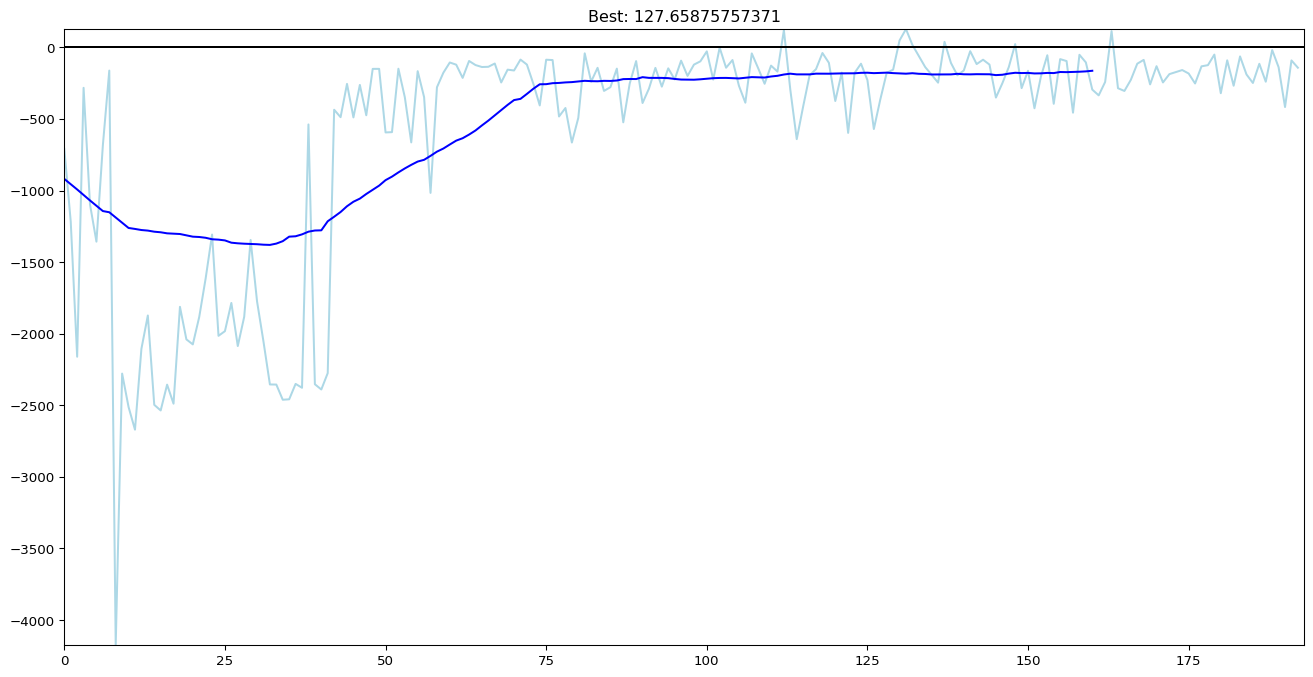

In [8]:
try:
    env.close()
except:
    pass

env = gym.make("BipedalWalker-v3", hardcore=False, render_mode=RENDER_AGENT)
plt.figure(figsize=(1600/96, 800/96), dpi=96)
observation, info = env.reset(seed=27)
steps_per_episode = 1600 # T
for episode in range(5000): # M
    rewards = 0
    step = 0
    while(step < steps_per_episode):
        action = agent.choose_action(observation, env.action_space)  # this is where you would insert your policy
        
        action = np.array(action)
        observation, reward, terminated, truncated, info = env.step(action)
        
        rewards += reward

        reward_agent = 100 * reward if reward > 0 else reward
        
        agent.update(observation, reward_agent, terminated, truncated)
        if terminated or truncated:
            observation, info = env.reset()

        step += 1
    scores.append(rewards)
    if episode % 10 == 0:
        print(f"Episode: {episode}, Reward: {rewards}, Memory Size: {agent.memory.size}")
    """
    m = max(scores) / steps_per_episode
    plt.clf()
    plt.title(f"Best: {m}")
    plt.plot(np.array(scores) / steps_per_episode)
    plt.axhline(y=0, color="grey", linestyle="-")
    plt.axhline(y=m, color="yellow", linestyle="-")
    plt.axhline(y=300 / steps_per_episode, color="red")
    plt.savefig("training.png")
"""

    ma = max(scores) 
    mi = min(scores) 
    plt.clf()
    plt.figure(figsize=(1600/96, 800/96), dpi=96)
    plt.title(f"Best: {ma}")
    plt.ylim((mi, ma))
    plt.xlim((0, len(scores)))

    plt.plot(np.array(scores), color="lightblue")
    plt.plot(moving_average(np.array(scores), 64)[:-32], color="blue") 
    plt.axhline(y=0, color="black", linestyle="-")
    plt.axhline(y=300, color="red", linestyle="-")
    plt.savefig("training.png")
    if RENDER_AGENT != None: 
        env.render()
    
    observation, info = env.reset()
env.close()


In [72]:
torch.save(agent.actor.state_dict(), "modded_learning_ddpg_actor.pth")
torch.save(agent.critic.state_dict(), "modded_learning_ddpg_critic.pth")

np.savetxt("scores.csv", scores, delimiter=",")
